In [1]:
import numpy as np
import pandas as pd
pd.options.display.float_format = "{:.4f}".format
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (16,10)
plt.style.use("~/.dracula.mplstyle")
import datetime as dt
import statsmodels.api as sm

In [2]:
ief = pd.read_excel("data/ief.xlsx")

zfh21 = pd.read_excel("data/zfh21.xlsx") # Mar
zfm21 = pd.read_excel("data/zfm21.xlsx") # Jun
zfu21 = pd.read_excel("data/zfu21.xlsx") # Sep
zfz21 = pd.read_excel("data/zfz21.xlsx") # Dec

znh21 = pd.read_excel("data/znh21.xlsx")
znm21 = pd.read_excel("data/znm21.xlsx")
znu21 = pd.read_excel("data/znu21.xlsx")
znz21 = pd.read_excel("data/znz21.xlsx")

data = [ief, zfh21, zfm21, zfu21, zfz21, znh21, znm21, znu21, znz21]

for d in data:
    d["Timestamp"] = pd.to_datetime(d["Timestamp"])
    
zf = pd.concat([
    zfh21[("2021-01-01"<=zfh21["Timestamp"]) & (zfh21["Timestamp"]<"2021-03-01")],
    zfm21[("2021-03-01"<=zfm21["Timestamp"]) & (zfm21["Timestamp"]<"2021-06-01")],
    zfu21[("2021-06-01"<=zfu21["Timestamp"]) & (zfu21["Timestamp"]<"2021-09-01")],
    zfz21[("2021-09-01"<=zfz21["Timestamp"]) & (zfz21["Timestamp"]<"2021-12-01")]
])

zn = pd.concat([
    znh21[("2021-01-01"<=znh21["Timestamp"]) & (znh21["Timestamp"]<"2021-03-01")],
    znm21[("2021-03-01"<=znm21["Timestamp"]) & (znm21["Timestamp"]<"2021-06-01")],
    znu21[("2021-06-01"<=znu21["Timestamp"]) & (znu21["Timestamp"]<"2021-09-01")],
    znz21[("2021-09-01"<=znz21["Timestamp"]) & (znz21["Timestamp"]<"2021-12-01")]
])

ief.set_index("Timestamp", inplace=True)
zf.set_index("Timestamp", inplace=True)
zn.set_index("Timestamp", inplace=True)

st = dt.time(9,30,0)
ed = dt.time(16,0,0)

ief = ief.between_time(st,ed)
zf  = zf.between_time(st,ed)
zn  = zn.between_time(st,ed)

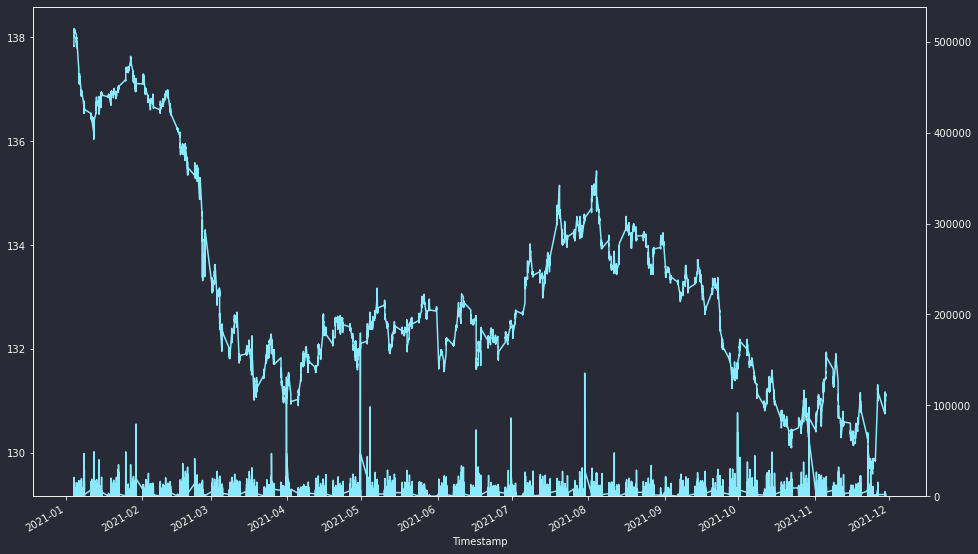

In [3]:
def plot_vwap_vol(zzz):
    fig, ax0 = plt.subplots()
    ax1 = ax0.twinx()

    zzz["VWAP"].plot(ax=ax0)
    zzz["VOLUME"].plot(ax=ax1)
    ax1.set_ylim([0,zzz["VOLUME"].max()*3])
    plt.show()

plot_vwap_vol(zn)

In [4]:
cons = zf.merge(zn, on="Timestamp", suffixes=("_ZF", "_ZN"))
cons = cons.merge(ief, on="Timestamp")
cons

,OPEN_ZF,HIGH_ZF,LOW_ZF,CLOSE_ZF,VOLUME_ZF,VWAP_ZF,OPEN_ZN,HIGH_ZN,LOW_ZN,CLOSE_ZN,VOLUME_ZN,VWAP_ZN,OPEN,HIGH,LOW,CLOSE,VOLUME,VWAP
Timestamp,,,,,,,,,,,,,,,,,,
2021-01-04 09:30:00,126.0938,126.0938,126.0781,126.0781,760,126.0820,137.8438,137.8438,137.8125,137.8125,4995,137.8256,119.6800,119.6800,119.6500,119.6600,78619,119.6770
2021-01-04 09:31:00,126.0781,126.0859,126.0781,126.0859,878,126.0793,137.8281,137.8281,137.8125,137.8281,1172,137.8239,119.6600,119.6800,119.6450,119.6470,7368,119.6551
2021-01-04 09:32:00,126.0781,126.0859,126.0781,126.0781,141,126.0787,137.8125,137.8281,137.8125,137.8125,694,137.8176,119.6400,119.6800,119.6400,119.6500,10349,119.6507
2021-01-04 09:33:00,126.0781,126.0859,126.0781,126.0859,4568,126.0859,137.8125,137.8281,137.8125,137.8281,4557,137.8278,119.6450,119.6600,119.6450,119.6500,32164,119.6514
2021-01-04 09:34:00,126.0859,126.0859,126.0781,126.0859,2910,126.0859,137.8281,137.8438,137.8125,137.8281,8632,137.8266,119.6500,119.6700,119.6500,119.6700,8621,119.6608
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-29 15:56:00,121.8359,121.8359,121.8281,121.8281,13,121.8353,131.1250,131.1250,131.1094,131.1094,68,131.1245,115.1400,115.1500,115.1200,115.1200,89481,115.1372
2021-11-29 15:57:00,121.8281,121.8359,121.8281,121.8359,268,121.8348,131.1094,131.1250,131.1094,131.1250,64,131.1240,115.1250,115.1300,115.1200,115.1200,168507,115.1275
2021-11-29 15:58:00,121.8281,121.8281,121.8281,121.8281,3,121.8281,131.1094,131.1094,131.1094,131.1094,5,131.1094,115.1200,115.1350,115.1200,115.1300,224911,115.1259
